# Skin Cancer Classification -- What are we going to do today!

<img src="images/skin.jpg">

The following article introduces this work done by Andre Esteva and his team, Dermatologist-level classification of skin cancer with deep neural networks.

The versatility of the smartphone is starting to have a serious impact in the medical world, with the ability to reveal low red blood cell counts, sleep apnea and even HIV all very real possibilities. Skin cancer too is a condition that might feel the wrath of these modern diagnostic tools, with an iPhone app way back in 2011 offering risk assessments on suspect moles. But a new research project at Stanford University is promising to bring things up to a professional grade of diagnosis, through a deep learning algorithm that can detect potential cancers with the same accuracy as dermatologists in early tests.

As is the case with all cancers, early detection of skin cancer is critical to survival rates. For melanoma detected in its early stages, the five-year survival rate is 97 percent, but those detected in its later stages carry a survival rate of just 14 percent. However, not everybody has ready access or the funds to drop by the doctor's office and get their skin oddities checked out as soon as they appear.

#### Step 0: Getting the data

A bit about data and pre-processing

#### Step 1: Importing necessary modules

#### Step 2: Loading a pre-trained module already 

Something about the pre-trained models such as InceptionV3, ResNets, GoogLeNet etc

#### Step 3: Pre-processing the data

#### Step 4: Building your model

#### Step 5: Training your model

#### Step 6: Doing some Transfer Learning

#### Step 7: Prediction function and classifying images

#### Addendum : Lot's of Rinse and Repeat in between  😀

WQe do a lot of stuff such as playing around with the learning_rate, 

#### Addendum on Steroids : Homework Exercise

1. Build an App with Android (using TensorFlow Lite) or iOS (Apple's coreML package)

###### Useful Links:
1. [Stanford article](https://news.stanford.edu/2017/01/25/artificial-intelligence-used-identify-skin-cancer/)
2. [Other news - Startup Grind](https://medium.com/startup-grind/how-can-ai-detect-skin-cancer-with-your-smartphone-df65cf040d48)
3. [Research paper](https://www.nature.com/articles/nature21056.epdf)

Notes: [Waya.ai's link gone dead](https://blog.waya.ai/ground-up-hands-on-deep-learning-tutorial-diagnosing-skin-cancer-w-dermatologist-level-61a90fe9f269)

4. More useful links as of Jan 2018 - see if still workds else modify the code to do so:
[ISIC Archive downloader : ](https://github.com/GalAvineri/ISIC-Archive-Downloader)

5. Original contest was [here](https://challenge.kitware.com/#phase/5840f53ccad3a51cc66c8dab),
[Udacity's wrapper on the contest](https://github.com/udacity/dermatologist-ai) is here -->
[Dasato](https://dasoto.github.io/skincancer/)

6. More links for ideas: [VGG, scrape and more](https://github.com/tanmoyopenroot/cancer_nn) | [Skin-Lesion-Analysis](https://github.com/JiteshPshah/Skin-Lesion-Analysis-Towards-Melanoma-Detection) | [RECOD guys](https://github.com/learningtitans/isbi2017-part3), [train_image](https://github.com/learningtitans/isbi2017-part3/blob/master/train_image_classifier.py) | [Inception modules explained](https://hacktilldawn.com/2016/09/25/inception-modules-explained-and-implemented/) | [VGG transfer learning](https://github.com/swapnilpote/isic-2017) | 


**Before we start** [No need to do this on your own server though), [more information look here](https://www.tensorflow.org/programmers_guide/using_gpu)

```python

import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config, ...)
```

## Step 1 : Import the necessary modules 

Go ahead and import the following pacakges/modules from keras:

InceptionV3: InceptionV2 model

preprocessing: data preprocessing helper module, we will use its image submodule

Dense, Dropout: CNN layers,

And any pacakges/modules you might need.

In [2]:
### switch off deprecation and future warnings
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Codes come here.
# Before import any package, it's good to install it first using command such as conda install tensorflow or conda install tensorflow.
# An eaxample:
from keras.applications.inception_v3 import InceptionV3, preprocess_input,decode_predictions
from keras.preprocessing import image
import numpy as np
from keras.layers import Dense, GlobalAveragePooling2D,Dropout,Input
# from keras.layers.advanced_activations import LeakyReLU, ELU
from keras.models import Sequential, Model
from keras import backend as K
from IPython.display import display

Using TensorFlow backend.


## Step 2 : Load the pre-trained model 

More about the [pre-trained models](https://www.pyimagesearch.com/2017/03/20/imagenet-vggnet-resnet-inception-xception-keras/)

In [4]:
# Load An InceptionV3 pre-trained model with InceptionV3 class of keras.applications module.
# for convenience, let's name this model instance as base_model.
# It might looks like base_model  = ...

"""
Signature: keras.applications.inception_v3.InceptionV3(include_top=True,
                                                       weights='imagenet',
                                                       input_tensor=None,
                                                       input_shape=None,
                                                       pooling=None,
                                                       classes=1000)
Docstring:
Instantiates the Inception v3 architecture.

Optionally loads weights pre-trained
on ImageNet. Note that when using TensorFlow,
for best performance you should set
`image_data_format='channels_last'` in your Keras config
at ~/.keras/keras.json.
The model and the weights are compatible with both
TensorFlow and Theano. The data format
convention used by the model is the one
specified in your Keras config file.
Note that the default input image size for this model is 299x299.

# Arguments
    include_top: whether to include the fully-connected
        layer at the top of the network.
    weights: one of `None` (random initialization)
        or 'imagenet' (pre-training on ImageNet).
    input_tensor: optional Keras tensor (i.e. output of `layers.Input()`)
        to use as image input for the model.
    input_shape: optional shape tuple, only to be specified
        if `include_top` is False (otherwise the input shape
        has to be `(299, 299, 3)` (with `channels_last` data format)
        or `(3, 299, 299)` (with `channels_first` data format).
        It should have exactly 3 inputs channels,
        and width and height should be no smaller than 139.
        E.g. `(150, 150, 3)` would be one valid value.
    pooling: Optional pooling mode for feature extraction
        when `include_top` is `False`.
        - `None` means that the output of the model will be
            the 4D tensor output of the
            last convolutional layer.
        - `avg` means that global average pooling
            will be applied to the output of the
            last convolutional layer, and thus
            the output of the model will be a 2D tensor.
        - `max` means that global max pooling will
            be applied.
    classes: optional number of classes to classify images
        into, only to be specified if `include_top` is True, and
        if no `weights` argument is specified.

# Returns
    A Keras model instance.
"""
base_model  = InceptionV3(weights= 'imagenet', include_top=False)
print('loaded model')

87916544/87910968 [==============================] - 133s 2us/step
loaded model


## Step 3 : Pre-processing the data

**Create an image data generator using ImageDataGenerator class, the generator helps us to make it easy to load data**

- Read more on Keras documentation [here](https://keras.io/preprocessing/image/)

An example:
```python
keras.preprocessing.image.ImageDataGenerator(featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-6,
    rotation_range=0.,
    width_shift_range=0.,
    height_shift_range=0.,
    shear_range=0.,
    zoom_range=0.,
    channel_shift_range=0.,
    fill_mode='nearest',
    cval=0.,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=K.image_data_format())
```    

Example code:

```python
# we create two instances with the same arguments
data_gen_args = dict(featurewise_center=True,
                     featurewise_std_normalization=True,
                     rotation_range=90.,
                     width_shift_range=0.1,
                     height_shift_range=0.1,
                     zoom_range=0.2)
image_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen = ImageDataGenerator(**data_gen_args)

```

In [5]:
#Define the dictionary for Image data Generator
data_gen_args = dict(preprocessing_function=preprocess_input,
                     rotation_range=30,
                     width_shift_range=0.2,
                     height_shift_range=0.2,
                     shear_range=0.2,
                     zoom_range=0.2,
                     horizontal_flip=True,
                     vertical_flip = True)

# create two instances with the same arguments for train and test
# basically you're merging stuff here
train_datagen = image.ImageDataGenerator(**data_gen_args)
test_datagen = image.ImageDataGenerator(**data_gen_args)

### 3.1 Loading the data

Load the data using `flow_from_directory` method of data Generator, which takes the path to a directory, and generates batches of augmented/normalized data

- Read the usage on Keras documentation [here](https://keras.io/preprocessing/image/)

Example Code:

```python
train_generator = train_datagen.flow_from_directory('data/train',
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary')
```


In [ ]:
train_generator = train_datagen.flow_from_directory("yourfolder/train", target_size=(299,299), batch_size=100)

valid_generator = test_datagen.flow_from_directory("yourfolder/valid", target_size=(299,299), batch_size=100)

## Step 4:  Building your model


#### Building your model architecture

**BTW -- you should see something like this on the terminal**

On your own dedicated box you don't need to throttle the GPU use but on a shared box )or shared activities with your own GPU operations, you can add the command we provided in the first cell of this notebook.

```shell
2018-02-15 11:21:51.550974: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:895] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2018-02-15 11:21:51.551358: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1105] Found device 0 with properties: 
name: GeForce GTX 1080 major: 6 minor: 1 memoryClockRate(GHz): 1.7335
pciBusID: 0000:01:00.0
totalMemory: 7.93GiB freeMemory: 7.81GiB
2018-02-15 11:21:51.551372: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1195] Creating TensorFlow device (/device:GPU:0) -> (device: 0, name: GeForce GTX 1080, pci bus id: 0000:01:00.0, compute capability: 6.1)
```

In [7]:
# Ensure you've imported the necessary packages/modules. If not yet, you can import them here
# Example:
# from keras.models import Sequential

# Define your CNN model such as 3 convolutional layers with max pooling and 2 fully layers with dropout here:
# conv2d—>maxpooling—>conv2d—>maxpooling—>conv2d—>maxpooling—> dropout—>Flatten—>Dense—>Dropout—>Dense
# Of course you can define model with more or less CNN layer, try it!
# Tips: Add layer with model.add function

from keras.layers import Conv2D,MaxPooling2D,Flatten

model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = 2, padding = 'same', activation = 'relu', input_shape = (299,299,3)))
model.add(MaxPooling2D(pool_size=2,padding='same'))
model.add(Conv2D(filters = 32, kernel_size = 2, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=2,padding='same'))
model.add(Conv2D(filters = 64, kernel_size = 2, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=2,padding='same'))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))


In [8]:
# Summary it and you should see something like this
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_95 (Conv2D)           (None, 299, 299, 16)      208       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 150, 150, 16)      0         
_________________________________________________________________
conv2d_96 (Conv2D)           (None, 150, 150, 32)      2080      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_97 (Conv2D)           (None, 75, 75, 64)        8256      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 38, 38, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 38, 38, 64)        0         
__________

### Compile your model


In [9]:
#Hints: use model.complie function to compile your model
# Recommended hyper-parameters: epochs=60, validation_steps=3

model.compile(loss = 'categorical_crossentropy',optimizer='rmsprop', metrics = ['accuracy'])

#### Early stopping

**What it is?**

In machine learning, early stopping is a form of regularization used to avoid overfitting when training a learner with an iterative method, such as gradient descent. Such methods update the learner so as to make it better fit the training data with each iteration. Up to a point, this improves the learner's performance on data outside of the training set. Past that point, however, improving the learner's fit to the training data comes at the expense of increased generalization error. Early stopping rules provide guidance as to how many iterations can be run before the learner begins to over-fit. Early stopping rules have been employed in many different machine learning methods, with varying amounts of theoretical foundation.
More on [Wikipedia](https://en.wikipedia.org/wiki/Early_stopping)

**How we do it in Keras**

```python

keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto')
Stop training when a monitored quantity has stopped improving.
```


In [10]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

# Save the model with best weights, do create a model folder with mkdir saved_model
checkpointer = ModelCheckpoint('saved_model/model.hdf5', verbose=1,save_best_only=True)
# Stop the training if the model shows no improvement 
stopper = EarlyStopping(monitor='val_loss',min_delta=0.1,patience=0,verbose=1,mode='auto')

## Step 5 : Training your model

In [13]:
# use model.fit_generator function to train your model
history = model.fit_generator(train_generator, 
                                  steps_per_epoch = 20,
                                  validation_data=valid_generator,
                                  validation_steps=3, 
                                  epochs=60, # try 10, just to give it a spin
                                  verbose=1,
                                  callbacks=[checkpointer])

**Does your model get low valuation loss or high accuracy?**

Hmm, guess it's not. How to improve it?

One solution is to use transfer learning.


## Step 6:  Transfer Learning

**What is it?**




Transfer learning is a machine learning method which utilizes a pre-trained neural network. For example, the image recognition model called Inception-v3 consists of two parts:

- Feature extraction part with a convolutional neural network.
- Classification part with fully-connected and softmax layers.

The pre-trained Inception-v3 model achieves state-of-the-art accuracy for recognizing general objects with 1000 classes, like "Zebra", "Dalmatian", and "Dishwasher". The model extracts general features from input images in the first part and classifies them based on those features in the second part.

<img src="https://codelabs.developers.google.com/codelabs/cpb102-txf-learning/img/bfea25ba557fbffc.png">

**Links**


In transfer learning, when you build a new model to classify your original dataset, you reuse the feature extraction part and re-train the classification part with your dataset. Since you don't have to train the feature extraction part (which is the most complex part of the model), you can train the model with less computational resources and training time.

[1](https://kwotsin.github.io/tech/2017/02/11/transfer-learning.html)
[2 Goog Codelab](https://codelabs.developers.google.com/codelabs/cpb102-txf-learning/index.html?index=..%2F..%2Findex#1)

**So, the idea is using a pre-trained model(InceptionV3) as feature extraction part and your model as the classification part**
What you need to do is:

1. Get the output of InceptionV3, assuming you have loaded the pre-trained model at step2
2. Define your model as the classifaction part
3. Load the pre-trained weights from HDF5 file
4. Freeze the original layers of pre-trained model(Inception3)
5. Train the classification part with your dataset

**Little tip:**

You should use Keras's `Model` class API, see [here](https://keras.io/models/model/)

Watch out for this error if you do
```python
model = Model(input=...)
```
it might throw this error:
```shell
UserWarning: Update your Model call to the Keras 2 API: Model(inputs=Tensor("in..., outputs=Tensor("de...)
```

In [15]:
# Get the output of Inceptionv3
# then input it to your classification part model
# Define the output layers for Inceptionv3
last = base_model.output
x = GlobalAveragePooling2D()(last)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
preds = Dense(3,activation='softmax')(x)

model = Model(inputs=base_model.input,outputs=preds)
model.summary()

### Loading weights for your model

**A little bit about HDF5**

HDF5 is a data model, library, and file format for storing and managing data. It supports an unlimited variety of datatypes, and is designed for flexible and efficient I/O and for high volume and complex data. HDF5 is portable and is extensible, allowing applications to evolve in their use of HDF5. The HDF5 Technology suite includes tools and applications for managing, manipulating, viewing, and analyzing data in the HDF5 format.

[link:](https://support.hdfgroup.org/HDF5/) or [Wikipedia definition](https://en.wikipedia.org/wiki/Hierarchical_Data_Format)

In [40]:
#Load the weights for the common layers from the benchmark model
# Tips: use load_weights function of keras.applications.inception_v3.InceptionV3
base_model.load_weights(filepath='saved_model/model.hdf5',by_name=True)

### Freeze the original layers of Inception3

A bit on finetuning trained models

[An example on fine-tuning InceptionV3 in keras](https://flyyufelix.github.io/2016/10/08/fine-tuning-in-keras-part2.html). Please look for latest work out there since this is from Oct 2016 and there might be latest stuff out there.

In [41]:
# set the weights of feature extractor be untrainable
for layer in base_model.layers:
    layer.trainable = False

### Compile the model 

In [42]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [43]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

# Save the model with best weights
checkpointer = ModelCheckpoint('saved_model/transfer_learning.hdf5', 
                               verbose=1,save_best_only=True)
# Stop the traning if the model shows no improvement
stopper = EarlyStopping(monitor='val_loss',min_delta=0.1,patience=1,
                        verbose=1,mode='auto')

In [17]:
# Train the model
history_transfer = model.fit_generator(train_generator, 
                                       steps_per_epoch = 20,
                                       validation_data=valid_generator,
                                       validation_steps=3, 
                                       epochs=5,
                                       verbose=1,
                                       callbacks=[checkpointer]
)

#### (Optional) Display the dictionary of training metrics values

In [18]:
display(history_transfer.history)

### Finally, Plotting the graph for accuracy and loss 

But lets define a simple function first...

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_training(history):
    acc = history.history['acc'] 
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs  = range(len(acc))
    
    plt.figure()
    plt.plot(epochs,acc,'b')
    plt.plot(epochs,val_acc,'r')
    plt.title("Training and validation accuracy")
    
    plt.figure()
    plt.plot(epochs,loss,'b')
    plt.plot(epochs,val_loss,'r')
    plt.title("Training and validation loss")
    
    plt.show()

In [19]:
plot_training(history_transfer)

### Can we do some fine tuning 

- Unfreezing modules at the end and see what works?
- Any other techniques?

[Research more here] : Good homework for you guys and me! 😁

In [20]:
for i, layer in enumerate(base_model.layers):
    print(i, layer.name)

### (Optional) Can we come back and unfreeze layers at the tail? 

Unfreeze the last X number of layers in the model and train these as well?
try only for inception

In [57]:
# Does it help if we unfreeze some layers up front
# reminder to self, come back if the accuracies don't improve

for layer in model.layers[:197]:
    layer.trainable = False
for layer in model.layers[197:]:
    layer.trainable = True

### Let's Compile again

What happens if we slow down the learning rate?

In [58]:
from keras.optimizers import adam

# use with slow learning rate and momentum to standard value
model.compile(optimizer=adam(lr=0.0001, beta_1=0.9, beta_2=0.999),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [59]:
# Save the mode wirth best validation loss

checkpointer = ModelCheckpoint("saved_model/fine_tuning.hdf5",
                              verbose = 1,
                              save_best_only = True,
                              monitor = "val_loss")

# Also we ensure that training stops if the validation loss doesn't improve

stoptheshow = EarlyStopping(monitor = 'val_loss, val_acc',
                           min_delta = 0.1,
                           patience = 2,
                           verbose = 1,
                           mode = 'auto')

#### Train this baby again!

In [ ]:
history = model.fit_generator(train_generator, 
                              steps_per_epoch=20,
                              validation_data = valid_generator,
                              validation_steps = 3,
                              epochs = 100,
                              verbose = 1,
                              callbacks = [checkpointer]
                             )

## Step 7:  Let's write our Prediction Function

1. First load the model you just saved
2. Then we write the prediction function
3. Then we predict :)

In [62]:
# Step 7.1 : load the trained model
model.load_weights('saved_model/fine_tuning.hdf5')

In [63]:
# Predict
from keras.preprocessing.image import img_to_array, load_img
import cv2

def predict_cancer(img_path):
    # first we load img and set targt size of our input model
    img = load_img(img_path, target_size = (299, 299))
    x = img_to_array(img)                 # coverting image to array
    x = np.expand_dims(x, axis=0)         # transform arrray to form a (1, x, y, z)
    x = preprocess_input(x)               # use preprocess input function , subtract the mean of all images
    p = None                              # Store the argmax the predictions, try to implement it by yourself
    
    if p == 0:
        print("melanoma")
    elif p == 1:
        print("nevus")
    elif p == 2:
        print("seborrheic_keratosis")

melanoma


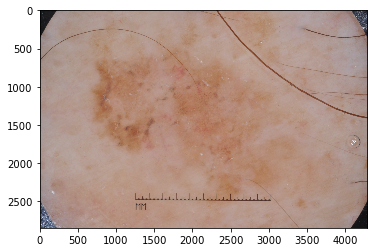

In [65]:
predict_cancer("data/test/melanoma/ISIC_0014181.jpg")
z = plt.imread("data/test/melanoma/ISIC_0014181.jpg")
plt.imshow(z)

In [21]:
# try to predict another image yourself


In [22]:
# plot the training accuracy and loss